In [1]:
%pylab inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'pandas'

In [257]:
# Loads followup ent data and identifies rescodes
data_type_followup = "f_Sections F,G,h - Ent.dta"
data_file_followup = "Analysis files/data/Followup/{0}".format(data_type_followup)
data_ent_followup = pd.read_stata(data_file_followup, convert_categoricals=False)

# takes the rescode column for the followup and removes duplicates 
rescodes_ent_followup = data_ent_followup[['rescode']]
rescodes_ent_followup = rescodes_ent_followup.drop_duplicates()

In [258]:
# Loads baseline education data and identifies rescodes
data_type_baseline = "personal info.dta"
data_file_baseline = "Analysis files/data/Baseline/{0}".format(data_type_baseline)
data_edu_baseline = pd.read_stata(data_file_baseline, convert_categoricals=False)

# takes the rescode column for the baseline and removes duplicates 
rescodes_edu_baseline = data_edu_baseline[['rescode']]
rescodes_edu_baseline = rescodes_edu_baseline.drop_duplicates()

In [259]:
# checks for accurate attrition rate
num_rescodes_edu_baseline = len(rescodes_edu_baseline)
num_rescodes_ent_followup = len(rescodes_ent_followup)
print("Number of households at baseline: ", num_rescodes_edu_baseline)
print("Number of households at followup: ", num_rescodes_ent_followup)
print("About the reported 16% attrition rate: ", 100 * (num_rescodes_edu_baseline - num_rescodes_ent_followup) / num_rescodes_edu_baseline)

Number of households at baseline:  1148
Number of households at followup:  961
About the reported 16% attrition rate:  16.28919860627178


In [260]:
# Removes attrition from baseline education data merge and sanity checks
updated_edu_baseline = rescodes_ent_followup.merge(data_edu_baseline, on="rescode", how="left")

updated_baseline_edu_rescodes = updated_edu_baseline["rescode"]
updated_baseline_edu_rescodes = updated_baseline_edu_rescodes.drop_duplicates()

num_updated_baseline_edu_rescodes = len(updated_baseline_edu_rescodes)
print("Number of households at followup: ", num_rescodes_ent_followup)
print("Number of households at adjusted baseline: ", num_updated_baseline_edu_rescodes)

print("Length of data_followup: ", len(data_ent_followup))
print("Length of updated_baseline: ", len(updated_edu_baseline))

Number of households at followup:  961
Number of households at adjusted baseline:  961
Length of data_followup:  961
Length of updated_baseline:  961


In [261]:
# Loads baseline ent data and identifies rescodes
data_type_baseline = "Sections F,G,h - Ent.dta"
data_file_baseline = "Analysis files/data/Baseline/{0}".format(data_type_baseline)
data_ent_baseline = pd.read_stata(data_file_baseline, convert_categoricals=False)

# takes the rescode column for the baseline and removes duplicates 
rescodes_ent_baseline = data_ent_baseline['rescode']
rescodes_ent_baseline = rescodes_ent_baseline.drop_duplicates()

In [262]:
# checks for accurate attrition rate
num_rescodes_ent_baseline = len(rescodes_ent_baseline)
print("Number of households at baseline: ", num_rescodes_ent_baseline)
print("Number of households at followup: ", num_rescodes_ent_followup)
print("About the reported 16% attrition rate: ", 100 * (num_rescodes_ent_baseline - num_rescodes_ent_followup) / num_rescodes_ent_baseline)

Number of households at baseline:  1148
Number of households at followup:  961
About the reported 16% attrition rate:  16.28919860627178


In [263]:
#Removes attrition from baseline education data merge and sanity checks
updated_ent_baseline = rescodes_ent_followup.merge(data_ent_baseline, on="rescode", how="left")
updated_baseline_ent_rescodes = updated_ent_baseline["rescode"]
updated_baseline_ent_rescodes = updated_baseline_ent_rescodes.drop_duplicates()

num_updated_baseline_edu_rescodes = len(updated_baseline_edu_rescodes)
print("Number of households at followup: ", num_rescodes_ent_followup)
print("Number of households at adjusted baseline: ", num_updated_baseline_edu_rescodes)

print("Length of data_followup: ", len(data_ent_followup))
print("Length of updated_baseline: ", len(updated_edu_baseline))

Number of households at followup:  961
Number of households at adjusted baseline:  961
Length of data_followup:  961
Length of updated_baseline:  961


In [264]:
# Now, we have updated_edu_baseline, updated_ent_baseline, and data_ent_followup. 
# Trims down each data frame to the columns we want
# Checks that rescodes are all in the same order

edu_baseline = updated_edu_baseline
ent_baseline = updated_ent_baseline[['rescode', 'treatment', 'enterprise', 'jointent', 'nrjointent', 'soleent', 'partnent']]
ent_followup = data_ent_followup[['rescode', 'treatment', 'f_enterprise', 'f_jointent', 'f_nrjointent', 'f_soleent', 'f_partnent']]

# Rescodes loaded in order from each df into separate arrays
b_edu_rescodes = list()
for i in edu_baseline.index:
    b_edu_rescodes.append(edu_baseline.at[i, "rescode"]) 

b_ent_rescodes = list()
for i in ent_baseline.index:
    b_ent_rescodes.append(ent_baseline.at[i, "rescode"]) 
    
f_ent_rescodes = list()
for i in ent_followup.index:
    f_ent_rescodes.append(ent_followup.at[i, "rescode"])  

# Rescode arrays elements compared in order to find discrepancies
no_mismatch = True
for i in range(len(b_edu_rescodes)):
    if b_edu_rescodes[i] != b_ent_rescodes[i]:
        no_mismatch = False
    if b_edu_rescodes[i] != f_ent_rescodes[i]:
        no_mismatch = False
    if b_ent_rescodes[i] != f_ent_rescodes[i]:
        no_mismatch = False
if no_mismatch:
    print("No rescode order mismatches; safe to join")

No rescode order mismatches; safe to join


In [265]:
# Creates big array with edu_baseline, ent_baseline, and ent_followup. Corrects NaN values to zero.
ent_edu_master = ent_baseline.join(ent_followup[['f_enterprise', 'f_jointent', 'f_nrjointent', 'f_soleent', 'f_partnent']])
#rowsToDrop = ent_edu_master[ent_edu_master.index > len(updated_edu_baseline.index) - 1]
#ent_edu_master = ent_edu_master.drop(rowsToDrop.index, axis=0)


ent_edu_master = ent_edu_master.join(edu_baseline[["age"]])
ent_edu_master = ent_edu_master.fillna(0)


ent_edu_master['age'] = ent_edu_master['age'].apply(lambda x: x//10)

#These bins were determined based off of size of each age bin
ent_edu_master.loc[ent_edu_master.age==1, 'age'] = 2
ent_edu_master.loc[ent_edu_master.age==6, 'age'] = 5



#df_control_graphing = ent_edu_graphing.loc[ent_edu_graphing['treatment'] == 0, :]
#rowsToDrop = ent_edu_master[ent_edu_master.index > len(updated_edu_baseline.index) - 1]
#ent_edu_master = ent_edu_master.drop(rowsToDrop.index, axis=0)

print("rescode treatment enterprise jointent nrjointent soleent partnent f_enterprise f_jointent f_nrjointent f_soleent f_partnent age")

print("Age bins are now 10-29, 30-39, 40-49, 50-69")

rescode treatment enterprise jointent nrjointent soleent partnent f_enterprise f_jointent f_nrjointent f_soleent f_partnent age
Age bins are now 10-29, 30-39, 40-49, 50-69


In [266]:
#Creates new data frame with twice as many rows (first set for baseline, second for followup) 
ent_edu_graphing = ent_edu_master.append(ent_edu_master, ignore_index=True)

#new row to indicate baseline (false) or followup (true)
ent_edu_graphing['baselineOrFollowup'] = ent_edu_graphing.index > len(updated_edu_baseline.index) - 1

#adds combined_enterprise that contains enterprise for the first half and f_enterprise for the second half
df = pd.DataFrame({'enterprise': ent_edu_master['enterprise'].append(ent_edu_master['f_enterprise'], ignore_index=True)})
ent_edu_graphing['combined_enterprise'] = df['enterprise']

#adds combined_jointent that contains jointent for the first half and f_jointent for the second half
df = pd.DataFrame({'jointent': ent_edu_master['jointent'].append(ent_edu_master['f_jointent'], ignore_index=True)})
ent_edu_graphing['combined_jointent'] = df['jointent']

#adds combined_enterprise that contains soleent for the first half and f_soleent for the second half
df = pd.DataFrame({'soleent': ent_edu_master['soleent'].append(ent_edu_master['f_soleent'], ignore_index=True)})
ent_edu_graphing['combined_soleent'] = df['soleent']

#adds combined_enterprise that contains partnent for the first half and f_partnent for the second half
df = pd.DataFrame({'partnent': ent_edu_master['partnent'].append(ent_edu_master['f_partnent'], ignore_index=True)})
ent_edu_graphing['combined_partnent'] = df['partnent']

print('rescode	treatment	enterprise	jointent	nrjointent	soleent	partnent	f_enterprise	f_jointent	f_nrjointent	f_soleent	f_partnent	edulow	eduvoc	eduhigh	baselineOrFollowup	education')
#ent_edu_graphing

rescode	treatment	enterprise	jointent	nrjointent	soleent	partnent	f_enterprise	f_jointent	f_nrjointent	f_soleent	f_partnent	edulow	eduvoc	eduhigh	baselineOrFollowup	education


In [267]:
#Find number of participants in each age bin
ageBin0 = len(ent_edu_master.loc[ent_edu_master['age'] == 0, :])
ageBin1 = len(ent_edu_master.loc[ent_edu_master['age'] == 1, :])
ageBin2 = len(ent_edu_master.loc[ent_edu_master['age'] == 2, :])
ageBin3 = len(ent_edu_master.loc[ent_edu_master['age'] == 3, :])
ageBin4 = len(ent_edu_master.loc[ent_edu_master['age'] == 4, :])
ageBin5 = len(ent_edu_master.loc[ent_edu_master['age'] == 5, :])
ageBin6 = len(ent_edu_master.loc[ent_edu_master['age'] == 6, :])
ageBin7 = len(ent_edu_master.loc[ent_edu_master['age'] == 7, :])
ageBin8 = len(ent_edu_master.loc[ent_edu_master['age'] == 8, :])
ageBin9 = len(ent_edu_master.loc[ent_edu_master['age'] == 9, :])
print(ageBin0)
print(ageBin1)
print(ageBin2)
print(ageBin3)
print(ageBin4)
print(ageBin5)
print(ageBin6)
print(ageBin7)
print(ageBin8)
print(ageBin9)


0
0
142
323
354
142
0
0
0
0


In [268]:
copyDF = ent_edu_graphing.copy()
copyDF["age"] = 10
ent_edu_graphing = ent_edu_graphing.append(copyDF, ignore_index=True, sort=False)


In [269]:
df_control_graphing = ent_edu_graphing.loc[ent_edu_graphing['treatment'] == 0, :]
df_individual_graphing = ent_edu_graphing.loc[ent_edu_graphing['treatment'] == 1, :]
df_group_graphing = ent_edu_graphing.loc[ent_edu_graphing['treatment'] == 2, :]

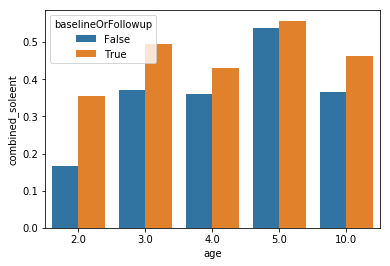

In [270]:
groupLoanGraphSoleent = sns.barplot(x='age', y="combined_soleent", hue="baselineOrFollowup", data=df_group_graphing, ci=None)

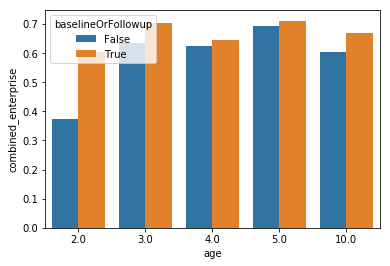

In [271]:
groupLoanGraphEnterprise = sns.barplot(x='age', y="combined_enterprise", hue="baselineOrFollowup", data=df_group_graphing, ci=None)